In [0]:
# Load the Drive helper and mount
import os
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/IDH Project Climate Change') #choose the directory you want as the working directory
# setting the working directory
os.getcwd() 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/IDH Project Climate Change'

In [0]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import math
import matplotlib.mlab as mlab
from math import exp
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from numpy import nan as NA
from scipy.stats import linregress
import scipy.cluster.vq
import scipy.spatial.distance
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

In [0]:

TempCountry = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
St96 = pd.read_csv('Stormdata_1996.csv', encoding='iso-8859-1')
St97 = pd.read_csv('Stormdata_1997.csv', encoding='iso-8859-1')
St98 = pd.read_csv('Stormdata_1998.csv', encoding='iso-8859-1')
St99 = pd.read_csv('Stormdata_1999.csv', encoding='iso-8859-1')
St00 = pd.read_csv('Stormdata_2000.csv', encoding='iso-8859-1')
St01 = pd.read_csv('Stormdata_2001.csv', encoding='iso-8859-1')
St02 = pd.read_csv('Stormdata_2002.csv', encoding='iso-8859-1')
St03 = pd.read_csv('Stormdata_2003.csv', encoding='iso-8859-1')
St04 = pd.read_csv('Stormdata_2004.csv', encoding='iso-8859-1')
St05 = pd.read_csv('Stormdata_2005.csv', encoding='iso-8859-1')
St06 = pd.read_csv('Stormdata_2006.csv', encoding='iso-8859-1')
St07 = pd.read_csv('Stormdata_2007.csv', encoding='iso-8859-1')
St08 = pd.read_csv('Stormdata_2008.csv', encoding='iso-8859-1')
St09 = pd.read_csv('Stormdata_2009.csv', encoding='iso-8859-1')
St10 = pd.read_csv('stormdata_2010.csv', encoding='iso-8859-1')
St11 = pd.read_csv('stormdata_2011.csv', encoding='iso-8859-1')
St12 = pd.read_csv('stormdata_2012.csv', encoding='iso-8859-1')
St13 = pd.read_csv('stormdata_2013.csv', encoding='iso-8859-1')
atl = pd.read_csv('atlantic.csv', encoding='iso-8859-1')
pac = pd.read_csv('pacific.csv', encoding='iso-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,28,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Dropping irrelevant columns for the storm data for our project:

St96.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St97.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St98.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St99.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St00.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St01.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St02.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St03.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St04.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St05.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St06.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St07.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St08.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St09.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St10.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St11.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St12.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)
St13.drop(columns =["BEGIN_YEARMONTH","BEGIN_DAY","BEGIN_TIME","END_YEARMONTH",
                    "END_DAY","END_TIME","EPISODE_ID","EVENT_ID", "STATE_FIPS",
                    "CZ_TYPE","CZ_FIPS","CZ_NAME", "WFO","CZ_TIMEZONE", "BEGIN_DATE_TIME", 
                    "END_DATE_TIME","INJURIES_DIRECT","INJURIES_INDIRECT","DEATHS_DIRECT",
                    "DEATHS_INDIRECT","DAMAGE_PROPERTY","DAMAGE_CROPS","SOURCE",
                    "MAGNITUDE","MAGNITUDE_TYPE","FLOOD_CAUSE","CATEGORY","TOR_F_SCALE",
                    "TOR_LENGTH","TOR_WIDTH","TOR_OTHER_WFO","TOR_OTHER_CZ_STATE",
                    "TOR_OTHER_CZ_FIPS","TOR_OTHER_CZ_NAME","BEGIN_RANGE","BEGIN_AZIMUTH",
                    "END_RANGE","BEGIN_LOCATION","END_AZIMUTH","END_LOCATION","BEGIN_LAT","BEGIN_LON",
                    "END_LAT","END_LON","EPISODE_NARRATIVE","EVENT_NARRATIVE",
                    "LAST_MOD_DATE","LAST_MOD_TIME","LAST_CERT_DATE","LAST_CERT_TIME",
                    "LAST_MOD","LAST_CERT","ADDCORR_FLG","ADDCORR_DATE"], inplace=True)

In [0]:
St13.head()

,STATE,YEAR,MONTH_NAME,EVENT_TYPE
0,ALABAMA,2013,January,Drought
1,COLORADO,2013,January,Drought
2,CALIFORNIA,2013,January,Sneakerwave
3,WYOMING,2013,January,Heavy Snow
4,SOUTH DAKOTA,2013,January,Heavy Snow


In [0]:
#Dropping all irrelevant data from the Global temperature data since we only want the U.S data:
TC2 = TempCountry[TempCountry.Country =='United States']

#getting average temperatures of USA from 1996-2013 manually
avgTemp96 = 8.7543
avgTemp97 = 9.175
avgTemp98 = 10.228
avgTemp99 = 9.567
avgTemp00 = 9.6498
avgTemp01 = 9.786
avgTemp02 = 9.8162
avgTemp03 = 9.7551
avgTemp04 = 9.6675
avgTemp05 = 9.893
avgTemp06 = 9.9745
avgTemp07 = 9.8375
avgTemp08 = 8.9514
avgTemp09 = 9.1371
avgTemp10 = 9.5056
avgTemp11 = 9.5499
avgTemp12 = 10.2628
avgTemp13 = 9.4526

allAvgTemps = [avgTemp96, avgTemp97, avgTemp98, avgTemp99, avgTemp00, avgTemp01, 
               avgTemp02, avgTemp03, avgTemp04, avgTemp05, avgTemp06, avgTemp07, 
               avgTemp08, avgTemp09, avgTemp10, avgTemp11, avgTemp12, avgTemp13] 



In [0]:
TC2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
554880,1768-09-01,15.420,2.880,United States
554881,1768-10-01,8.162,3.386,United States
554882,1768-11-01,1.591,3.783,United States
554883,1768-12-01,-2.882,4.979,United States
554884,1769-01-01,-3.952,4.856,United States


In [0]:
#Removing irrelevant data columns from the atlantic and pacific hurricanes and typhoons data:
atl.drop(columns =["ID","Time","Event","Latitude","Longitude",
                   "Maximum Wind","Minimum Pressure","Low Wind NE","Low Wind SE",
                   "Low Wind SW","Low Wind NW","Moderate Wind NE","Moderate Wind SE",
                   "Moderate Wind NW","Moderate Wind SW","High Wind NE","High Wind SE",
                   "High Wind NW","High Wind SW"],inplace=True)
pac.drop(columns =["ID","Time","Event","Latitude","Longitude",
                   "Maximum Wind","Minimum Pressure","Low Wind NE","Low Wind SE",
                   "Low Wind SW","Low Wind NW","Moderate Wind NE","Moderate Wind SE",
                   "Moderate Wind NW","Moderate Wind SW","High Wind NE","High Wind SE",
                   "High Wind NW","High Wind SW"],inplace=True)

In [0]:
atl.head()

,Name,Date,Status
0,UNNAMED,18510625,HU
1,UNNAMED,18510625,HU
2,UNNAMED,18510625,HU
3,UNNAMED,18510625,HU
4,UNNAMED,18510625,HU


In [0]:
pac.head()

,Name,Date,Status
0,UNNAMED,19490611,TS
1,UNNAMED,19490611,TS
2,UNNAMED,19490611,TS
3,UNNAMED,19490611,TS
4,UNNAMED,19490612,TS


In [0]:
#Dropping all NAN/null values in each dataset
St96.dropna()
St97.dropna()
St98.dropna()
St99.dropna()
St00.dropna()
St01.dropna()
St02.dropna()
St03.dropna()
St04.dropna()
St05.dropna()
St06.dropna()
St07.dropna()
St08.dropna()
St09.dropna()
St10.dropna()
St11.dropna()
St12.dropna()
St13.dropna()
atl.dropna()
pac.dropna()
TC2.dropna()


#merging all the storm data sets
filenames = ['Stormdata_1996.csv', 'Stormdata_1997.csv', 'Stormdata_1998.csv', 'Stormdata_1999.csv', 'Stormdata_2000.csv', 'Stormdata_2001.csv', 'Stormdata_2002.csv', 'Stormdata_2003.csv'
            , 'Stormdata_2004.csv', 'Stormdata_2005.csv', 'Stormdata_2006.csv', 'Stormdata_2007.csv', 'Stormdata_2008.csv', 'Stormdata_2009.csv', 'stormdata_2010.csv', 'stormdata_2011.csv'
            , 'stormdata_2012.csv', 'stormdata_2013.csv'] 
allSt = []
for f in filenames:
  allSt.append(pd.read_csv(f,encoding='iso-8859-1'))
  
#merging atlantic and pacific data  
atlPacFiles = ['atlantic.csv', 'pacific.csv']
AtlaPaci = []
for f in atlPacFiles:
  AtlaPaci.append(pd.read_csv(f,encoding='iso-8859-1'))

#counting the number of unique events of each year from corresponding event type column  
events96 = St96['EVENT_TYPE'].loc[St96['EVENT_TYPE'].shift() != St96['EVENT_TYPE']].sum()
events97 = St97['EVENT_TYPE'].loc[St97['EVENT_TYPE'].shift() != St97['EVENT_TYPE']].sum()
events98 = St98['EVENT_TYPE'].loc[St98['EVENT_TYPE'].shift() != St98['EVENT_TYPE']].sum()
events99 = St99['EVENT_TYPE'].loc[St99['EVENT_TYPE'].shift() != St99['EVENT_TYPE']].sum()
events00 = St00['EVENT_TYPE'].loc[St00['EVENT_TYPE'].shift() != St00['EVENT_TYPE']].sum()
events01 = St01['EVENT_TYPE'].loc[St01['EVENT_TYPE'].shift() != St01['EVENT_TYPE']].sum()
events02 = St02['EVENT_TYPE'].loc[St02['EVENT_TYPE'].shift() != St02['EVENT_TYPE']].sum()
events03 = St03['EVENT_TYPE'].loc[St03['EVENT_TYPE'].shift() != St03['EVENT_TYPE']].sum()
events04 = St04['EVENT_TYPE'].loc[St04['EVENT_TYPE'].shift() != St04['EVENT_TYPE']].sum()
events05 = St05['EVENT_TYPE'].loc[St05['EVENT_TYPE'].shift() != St05['EVENT_TYPE']].sum()
events06 = St06['EVENT_TYPE'].loc[St06['EVENT_TYPE'].shift() != St06['EVENT_TYPE']].sum()
events07 = St07['EVENT_TYPE'].loc[St07['EVENT_TYPE'].shift() != St07['EVENT_TYPE']].sum()
events08 = St08['EVENT_TYPE'].loc[St08['EVENT_TYPE'].shift() != St08['EVENT_TYPE']].sum()
events09 = St09['EVENT_TYPE'].loc[St09['EVENT_TYPE'].shift() != St09['EVENT_TYPE']].sum()
events10 = St10['EVENT_TYPE'].loc[St10['EVENT_TYPE'].shift() != St10['EVENT_TYPE']].sum()
events11 = St11['EVENT_TYPE'].loc[St11['EVENT_TYPE'].shift() != St11['EVENT_TYPE']].sum()
events12 = St12['EVENT_TYPE'].loc[St12['EVENT_TYPE'].shift() != St12['EVENT_TYPE']].sum()
events13 = St13['EVENT_TYPE'].loc[St13['EVENT_TYPE'].shift() != St13['EVENT_TYPE']].sum()



#over 18 years
events = [len(events96), len(events97), len(events98), len(events99), len(events00), len(events01), len(events02), 
         len(events03), len(events04), len(events05), len(events06), len(events07), len(events08), len(events09), 
         len(events10), len(events11), len(events12), len(events13)]






/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,28,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
y1= np.matrix(events).transpose()
x1 = np.matrix(allAvgTemps).transpose()

#X = sm.add_constant(x1)

Coefficients:  [24977.85368967]
Intercept:  24977.853689666168
P-Values:  [1.50333188e-13]
R Squared:  0.9623980442691629


Text(0, 0.5, 'Number of Natural Events Occured')

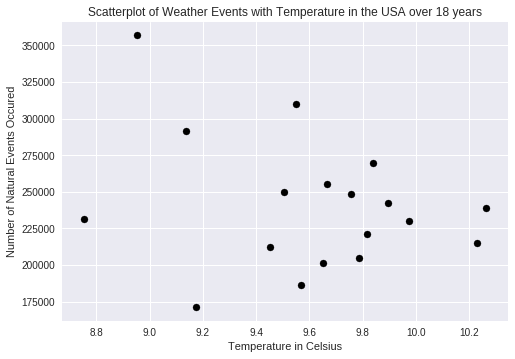

In [0]:
MODEL = sm.OLS(y1,x1)
results = MODEL.fit()


print('Coefficients: ', results.params[0:2]) # = 24977.85368967
print('Intercept: ', results.params[0])# = 24977.853689666168
print('P-Values: ', results.pvalues) # = 1.50333188e-13
print('R Squared: ', results.rsquared) # = 0.9623980442691629

x1 = np.array(x1)
y1 = np.array(y1)
plt.scatter(x1, y1,  color='black')
plt.title('Scatterplot of Weather Events with Temperature in the USA over 18 years')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Number of Natural Events Occured')

In [0]:
#counting number of unique tropical storms and hurricanes for each year
storms96 = pac.loc[(pac['Date'] >= 19960513) & (pac['Date'] < 19970601), 'Name'].nunique()
storms97 = pac.loc[(pac['Date'] >= 19970601) & (pac['Date'] < 19980611), 'Name'].nunique()
storms98 = pac.loc[(pac['Date'] >= 19980611) & (pac['Date'] < 19990618), 'Name'].nunique()
storms99 = pac.loc[(pac['Date'] >= 19990618) & (pac['Date'] < 20000522), 'Name'].nunique()
storms00 = pac.loc[(pac['Date'] >= 20000522) & (pac['Date'] < 20001002), 'Name'].nunique()
storms01 = pac.loc[(pac['Date'] >= 20001002) & (pac['Date'] < 20020524), 'Name'].nunique()
storms02 = pac.loc[(pac['Date'] >= 20020524) & (pac['Date'] < 20030519), 'Name'].nunique()
storms03 = pac.loc[(pac['Date'] >= 20030519) & (pac['Date'] < 20040522), 'Name'].nunique()
storms04 = pac.loc[(pac['Date'] >= 20040522) & (pac['Date'] < 20050517), 'Name'].nunique()
storms05 = pac.loc[(pac['Date'] >= 20050517) & (pac['Date'] < 20060527), 'Name'].nunique()
storms06 = pac.loc[(pac['Date'] >= 20060527) & (pac['Date'] < 20070527), 'Name'].nunique()
storms07 = pac.loc[(pac['Date'] >= 20070527) & (pac['Date'] < 20080529), 'Name'].nunique()
storms08 = pac.loc[(pac['Date'] >= 20080529) & (pac['Date'] < 20090617), 'Name'].nunique()
storms09 = pac.loc[(pac['Date'] >= 20090617) & (pac['Date'] < 20100528), 'Name'].nunique()
storms10 = pac.loc[(pac['Date'] >= 20100528) & (pac['Date'] < 20110607), 'Name'].nunique()
storms11 = pac.loc[(pac['Date'] >= 20110607) & (pac['Date'] < 20120513), 'Name'].nunique()
storms12 = pac.loc[(pac['Date'] >= 20120513) & (pac['Date'] < 20130513), 'Name'].nunique()
storms13 = pac.loc[(pac['Date'] >= 20130513) & (pac['Date'] < 20140522), 'Name'].nunique()

storms96Atl = atl.loc[(atl['Date'] >= 19960617) & (atl['Date'] < 19970531), 'Name'].nunique()
storms97Atl = atl.loc[(atl['Date'] >= 19970531) & (atl['Date'] < 19980727), 'Name'].nunique()
storms98Atl = atl.loc[(atl['Date'] >= 19980727) & (atl['Date'] < 19990611), 'Name'].nunique()
storms99Atl = atl.loc[(atl['Date'] >= 19990611) & (atl['Date'] < 20000607), 'Name'].nunique()
storms00Atl = atl.loc[(atl['Date'] >= 20000607) & (atl['Date'] < 20011004), 'Name'].nunique()
storms01Atl = atl.loc[(atl['Date'] >= 20011004) & (atl['Date'] < 20020714), 'Name'].nunique()
storms02Atl = atl.loc[(atl['Date'] >= 20020714) & (atl['Date'] < 20030418), 'Name'].nunique()
storms03Atl = atl.loc[(atl['Date'] >= 20030418) & (atl['Date'] < 20040731), 'Name'].nunique()
storms04Atl = atl.loc[(atl['Date'] >= 20040731) & (atl['Date'] < 20050608), 'Name'].nunique()
storms05Atl = atl.loc[(atl['Date'] >= 20050608) & (atl['Date'] < 20060610), 'Name'].nunique()
storms06Atl = atl.loc[(atl['Date'] >= 20060610) & (atl['Date'] < 20070506), 'Name'].nunique()
storms07Atl = atl.loc[(atl['Date'] >= 20070506) & (atl['Date'] < 20080531), 'Name'].nunique()
storms08Atl = atl.loc[(atl['Date'] >= 20080531) & (atl['Date'] < 20090526), 'Name'].nunique()
storms09Atl = atl.loc[(atl['Date'] >= 20090526) & (atl['Date'] < 20100624), 'Name'].nunique()
storms10Atl = atl.loc[(atl['Date'] >= 20100624) & (atl['Date'] < 20110628), 'Name'].nunique()
storms11Atl = atl.loc[(atl['Date'] >= 20110628) & (atl['Date'] < 20120519), 'Name'].nunique()
storms12Atl = atl.loc[(atl['Date'] >= 20120519) & (atl['Date'] < 20130605), 'Name'].nunique()
storms13Atl = atl.loc[(atl['Date'] >= 20130605) & (atl['Date'] < 20140628), 'Name'].nunique()

atlaPaciSum = [(storms96 + storms96Atl), (storms97 + storms97Atl), (storms98 + storms98Atl), (storms99 + storms99Atl), 
              (storms00 + storms00Atl), (storms01 + storms01Atl), (storms02 + storms02Atl), (storms03 + storms03Atl), 
              (storms04 + storms04Atl), (storms05 + storms05Atl), (storms06 + storms06Atl), (storms07 + storms07Atl), 
              (storms08 + storms08Atl), (storms09 + storms09Atl), (storms10 + storms10Atl), (storms11 + storms10Atl), 
              (storms12 + storms12Atl), (storms13 + storms13Atl)]


Coefficients:  [3.37119661]
Intercept:  3.3711966093038055
P-Values:  [3.28899097e-14]
R Squared:  0.9685435778480557


Text(0, 0.5, 'Number of Hurricanes and Typhoons Occured')

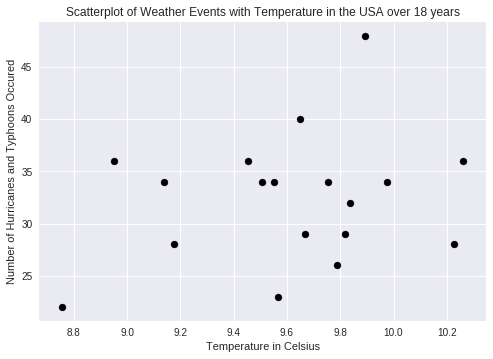

In [0]:
y2= np.matrix(atlaPaciSum).transpose()
x2 = np.matrix(allAvgTemps).transpose()

MODEL = sm.OLS(y2,x2)
results = MODEL.fit()



print('Coefficients: ', results.params[0:2]) # = 3.37119661
print('Intercept: ', results.params[0])# = 3.3711966093038055
print('P-Values: ', results.pvalues) # = 3.28899097e-14
print('R Squared: ', results.rsquared) # = 0.9685435778480557

x2 = np.array(x2)
y2 = np.array(y2)
plt.scatter(x2, y2,  color='black')
plt.title('Scatterplot of Weather Events with Temperature in the USA over 18 years')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Number of Hurricanes and Typhoons Occured')


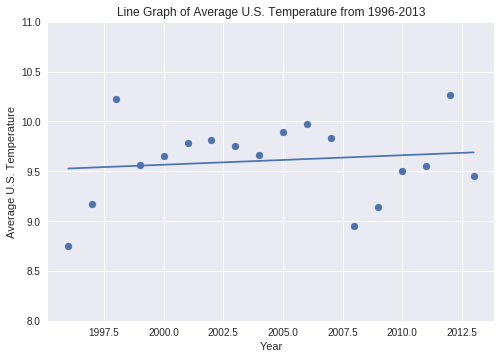

In [0]:
tempY = allAvgTemps
YearX = [1996, 1997, 1998, 1999, 2000, 2001,
     2002, 2003, 2004, 2005, 2006, 2007,
     2008, 2009, 2010, 2011, 2012, 2013]

plt.xlabel('Year')
plt.ylabel('Average U.S. Temperature')
plt.title('Line Graph of Average U.S. Temperature from 1996-2013')
plt.ylim(8, 11)
plt.scatter(YearX, tempY)
plt.plot(np.unique(YearX), np.poly1d(np.polyfit(YearX, tempY, 1))(np.unique(YearX)))


<BarContainer object of 18 artists>

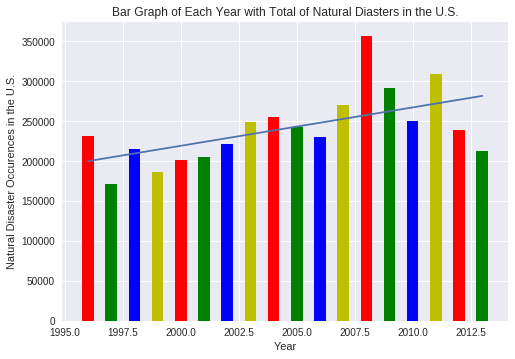

In [0]:
myColors = 'rgby'


plt.xlabel('Year')
plt.ylabel('Natural Disaster Occurences in the U.S.')
plt.title('Bar Graph of Each Year with Total of Natural Diasters in the U.S.')

plt.plot(np.unique(YearX), np.poly1d(np.polyfit(YearX, events, 1))(np.unique(YearX)))

plt.bar(YearX, events, width=.5, align='center', color=myColors)

